<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Context" data-toc-modified-id="Context-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Context</a></span></li></ul></li><li><span><a href="#Install-packages" data-toc-modified-id="Install-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Install packages</a></span></li><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in Data</a></span></li><li><span><a href="#Examine-Structure-of-DF" data-toc-modified-id="Examine-Structure-of-DF-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Examine Structure of DF</a></span></li><li><span><a href="#Examine-Features" data-toc-modified-id="Examine-Features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Examine Features</a></span><ul class="toc-item"><li><span><a href="#Outliers" data-toc-modified-id="Outliers-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Examine-clusters" data-toc-modified-id="Examine-clusters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Examine clusters</a></span><ul class="toc-item"><li><span><a href="#Dendrogram" data-toc-modified-id="Dendrogram-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Dendrogram</a></span></li><li><span><a href="#Individual-Clusters" data-toc-modified-id="Individual-Clusters-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Individual Clusters</a></span><ul class="toc-item"><li><span><a href="#Upstarts-Vs-Stars-Comparison" data-toc-modified-id="Upstarts-Vs-Stars-Comparison-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Upstarts Vs Stars Comparison</a></span></li></ul></li></ul></li></ul></div>

# Intro

## Context

My main research question is: Which democrats are talked about together? I'm also interested in who is the most unique candidate. 

For this analysis, I am using Normalized Google Distance (NGD). This is a semantic similarity measure, calculated based on the number of hits returned by Google for a set of keywords. If keywords have many pages in common relative to their frequencies, then these keywords are thought to be semantically similar. If two search terms w1 and w2 never occur together on the same web page, but do occur separately, the NGD between them is infinite. Conversely, if both terms always occur together, their NGD is zero.

I calculated the pairwise NGD between all candidates and am using that data to answer my questions. Candidates with a higher NGD are "far apart" and candidates with a lower NGD are "close together".  

# Install packages

In [59]:
import io
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from IPython.display import display
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import networkx as nx
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

First let's read in the DF. 

# Read in Data

In [60]:
# Read in DF
url="https://raw.githubusercontent.com/josh-ashkinaze/Democrat-Media-Distances/master/distances.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df = df[[col for col in df.columns if "Unnamed" not in col]] # drop col Pandas adds
df.index = df.columns
display(df)

,Bill de Blasio,Andrew Yang,Marianne Williamson,Elizabeth Warren,Tom Steyer,Joe Sestak,Tim Ryan,Beto O Rourke,Seth Moulton,Jay Inslee,...,Cory Booker,Steve Bullock,Pete Buttigieg,Julian Castro,John Delaney,Tulsi Gabbard,Kirsten Gillibrand,Kamala Harris,John Hickenlooper,Bernie Sanders
Bill de Blasio,0.000000,0.819502,0.615160,0.736249,0.506947,0.552414,0.810812,0.475617,0.521236,0.471498,...,0.440610,0.677429,0.508726,0.559723,0.697220,0.505866,0.458505,0.646431,0.487790,0.684899
Andrew Yang,0.819502,0.000000,0.711592,0.663000,0.747881,0.750006,0.650591,0.844880,0.700839,0.748888,...,0.694815,0.729353,0.811920,0.521814,0.675212,0.772636,0.760338,0.778218,0.688187,0.789168
Marianne Williamson,0.615160,0.711592,0.000000,0.623683,0.607333,0.590865,0.666526,0.591342,0.485855,0.541001,...,0.515906,0.602369,0.534310,0.480783,0.580852,0.581866,0.514009,0.629178,0.475485,0.692438
Elizabeth Warren,0.736249,0.663000,0.623683,0.000000,0.705140,0.724156,0.587968,0.599459,0.622788,0.689718,...,0.514845,0.528170,0.635616,0.513035,0.560726,0.679910,0.612755,0.462563,0.669170,0.460050
Tom Steyer,0.506947,0.747881,0.607333,0.705140,0.000000,0.450688,0.776233,0.536778,0.447020,0.430642,...,0.495981,0.704451,0.517340,0.595031,0.663535,0.518532,0.393074,0.568653,0.359651,0.667132
Joe Sestak,0.552414,0.750006,0.590865,0.724156,0.450688,0.000000,0.717499,0.581209,0.400825,0.412789,...,0.551496,0.637269,0.577031,0.554888,0.622120,0.532051,0.433629,0.665505,0.407646,0.633319
Tim Ryan,0.810812,0.650591,0.666526,0.587968,0.776233,0.717499,0.000000,0.852353,0.670213,0.762437,...,0.641888,0.525501,0.894665,0.535488,0.574245,0.785487,0.730792,0.756766,0.698171,0.690900
Beto O Rourke,0.475617,0.844880,0.591342,0.599459,0.536778,0.581209,0.852353,0.000000,0.446587,0.445580,...,0.356978,0.702970,0.398383,0.504477,0.621538,0.409285,0.390572,0.487902,0.457293,0.555405
Seth Moulton,0.521236,0.700839,0.485855,0.622788,0.447020,0.400825,0.670213,0.446587,0.000000,0.357412,...,0.419315,0.556292,0.543968,0.511931,0.509779,0.332289,0.315530,0.545401,0.361559,0.678449
Jay Inslee,0.471498,0.748888,0.541001,0.689718,0.430642,0.412789,0.762437,0.445580,0.357412,0.000000,...,0.451077,0.611279,0.473543,0.526338,0.597250,0.378674,0.347782,0.569050,0.274458,0.642907


Now we examine the structure of the dataframe. 

# Examine Structure of DF

In [61]:
# Examine structure
df.head()
display("Length: {}".format(len(df)))
display(df.columns)
display(df.dtypes)
display(df.head())
display(df.columns)

'Length: 24'

Index(['Bill de Blasio', 'Andrew Yang', 'Marianne Williamson',
       'Elizabeth Warren', 'Tom Steyer', 'Joe Sestak', 'Tim Ryan',
       'Beto O Rourke', 'Seth Moulton', 'Jay Inslee', 'Amy Klobuchar',
       'Wayne Messam', 'Michael Bennet', 'Joe Biden', 'Cory Booker',
       'Steve Bullock', 'Pete Buttigieg', 'Julian Castro', 'John Delaney',
       'Tulsi Gabbard', 'Kirsten Gillibrand', 'Kamala Harris',
       'John Hickenlooper', 'Bernie Sanders'],
      dtype='object')

Bill de Blasio         float64
Andrew Yang            float64
Marianne Williamson    float64
Elizabeth Warren       float64
Tom Steyer             float64
Joe Sestak             float64
Tim Ryan               float64
Beto O Rourke          float64
Seth Moulton           float64
Jay Inslee             float64
Amy Klobuchar          float64
Wayne Messam           float64
Michael Bennet         float64
Joe Biden              float64
Cory Booker            float64
Steve Bullock          float64
Pete Buttigieg         float64
Julian Castro          float64
John Delaney           float64
Tulsi Gabbard          float64
Kirsten Gillibrand     float64
Kamala Harris          float64
John Hickenlooper      float64
Bernie Sanders         float64
dtype: object

,Bill de Blasio,Andrew Yang,Marianne Williamson,Elizabeth Warren,Tom Steyer,Joe Sestak,Tim Ryan,Beto O Rourke,Seth Moulton,Jay Inslee,...,Cory Booker,Steve Bullock,Pete Buttigieg,Julian Castro,John Delaney,Tulsi Gabbard,Kirsten Gillibrand,Kamala Harris,John Hickenlooper,Bernie Sanders
Bill de Blasio,0.000000,0.819502,0.615160,0.736249,0.506947,0.552414,0.810812,0.475617,0.521236,0.471498,...,0.440610,0.677429,0.508726,0.559723,0.697220,0.505866,0.458505,0.646431,0.487790,0.684899
Andrew Yang,0.819502,0.000000,0.711592,0.663000,0.747881,0.750006,0.650591,0.844880,0.700839,0.748888,...,0.694815,0.729353,0.811920,0.521814,0.675212,0.772636,0.760338,0.778218,0.688187,0.789168
Marianne Williamson,0.615160,0.711592,0.000000,0.623683,0.607333,0.590865,0.666526,0.591342,0.485855,0.541001,...,0.515906,0.602369,0.534310,0.480783,0.580852,0.581866,0.514009,0.629178,0.475485,0.692438
Elizabeth Warren,0.736249,0.663000,0.623683,0.000000,0.705140,0.724156,0.587968,0.599459,0.622788,0.689718,...,0.514845,0.528170,0.635616,0.513035,0.560726,0.679910,0.612755,0.462563,0.669170,0.460050
Tom Steyer,0.506947,0.747881,0.607333,0.705140,0.000000,0.450688,0.776233,0.536778,0.447020,0.430642,...,0.495981,0.704451,0.517340,0.595031,0.663535,0.518532,0.393074,0.568653,0.359651,0.667132


Index(['Bill de Blasio', 'Andrew Yang', 'Marianne Williamson',
       'Elizabeth Warren', 'Tom Steyer', 'Joe Sestak', 'Tim Ryan',
       'Beto O Rourke', 'Seth Moulton', 'Jay Inslee', 'Amy Klobuchar',
       'Wayne Messam', 'Michael Bennet', 'Joe Biden', 'Cory Booker',
       'Steve Bullock', 'Pete Buttigieg', 'Julian Castro', 'John Delaney',
       'Tulsi Gabbard', 'Kirsten Gillibrand', 'Kamala Harris',
       'John Hickenlooper', 'Bernie Sanders'],
      dtype='object')

# Examine Features

## Outliers

In [62]:
# We will look at who has the most variance in distances 
# and who has the largest and smallest distances. 

def analyze_observations(df, stats):
    summary = df.describe() # Table of summary stats
    summary = summary.T # Transpose data frame
    for stat in stats:
        print("\n MAX OF {}".format(stat))
        print(summary.loc[summary[stat].idxmax()])
        print("\n MIN OF {}".format(stat), "\n")
        print(summary.loc[summary[stat].idxmin()])


stats = ['std', 'mean', '50%']
analyze_observations(df, stats)


 MAX OF std
count    24.000000
mean      0.543281
std       0.183585
min       0.000000
25%       0.484383
50%       0.547296
75%       0.652792
max       0.826766
Name: Joe Biden, dtype: float64

 MIN OF std 

count    24.000000
mean      0.526167
std       0.124010
min       0.000000
25%       0.512759
50%       0.534822
75%       0.561631
max       0.683159
Name: Julian Castro, dtype: float64

 MAX OF mean
count    24.000000
mean      0.700453
std       0.164992
min       0.000000
25%       0.684943
50%       0.735905
75%       0.774031
max       0.844880
Name: Andrew Yang, dtype: float64

 MIN OF mean 

count    24.000000
mean      0.430136
std       0.166307
min       0.000000
25%       0.315056
50%       0.447599
75%       0.523156
max       0.736466
Name: Amy Klobuchar, dtype: float64

 MAX OF 50%
count    24.000000
mean      0.700453
std       0.164992
min       0.000000
25%       0.684943
50%       0.735905
75%       0.774031
max       0.844880
Name: Andrew Yang, dtype: float

One takeaway is that Andrew Yang is by far the most "unique" candidate. On average, he is further from candidates than any other candidate. This will probably show up in the tree diagram, too.

In [64]:
# Let's just set up the enviorment for graphing 
def config_graph(colors, font_scale):
    """
    Configures the Seaborn plotting settings such that
    (1) fonts are bigger
    (2) white background of charts
    (3) my blog's colors are used
    (4) Arial is the default font 
    """
    sns.set(
            context="poster", 
            style="white", 
            font_scale=font_scale, 
            palette=colors, 
            rc={
                'axes.facecolor':'#F5F5F5', 
                'figure.facecolor':'#F5F5F5'
            }
    )
    plt.rcParams['font.sans-serif'] = "Arial" # Arial as default sans serif font
    plt.rcParams["font.family"] = "sans-serif"# Always use sans serif 
 
my_colors = ["#252627", "#0B132B", "#E6D3A3"]

# Examine clusters

## Dendrogram

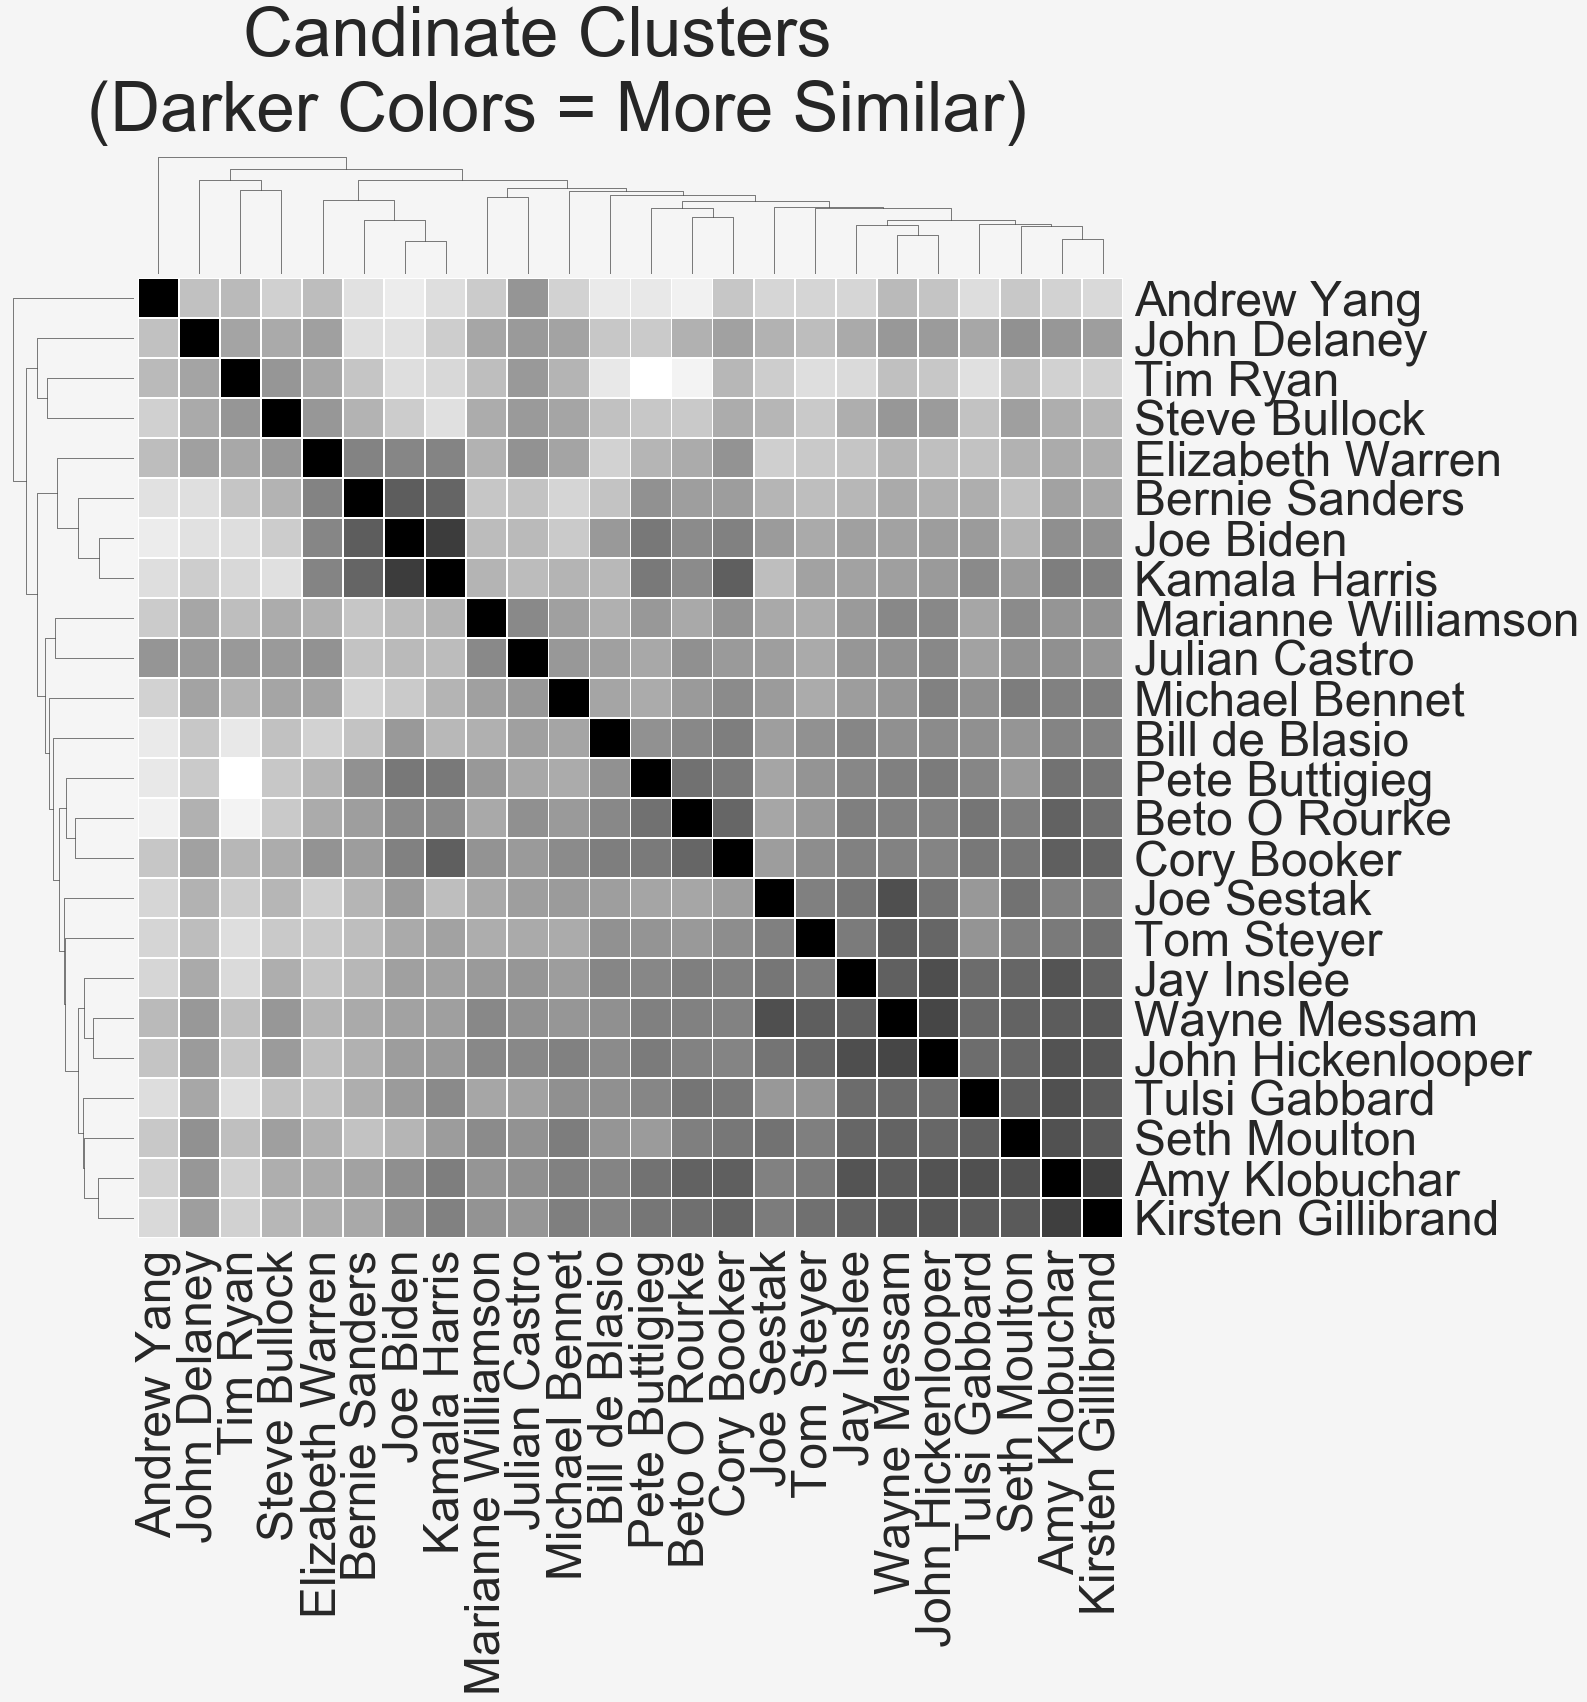

In [65]:
# Hierarhical Clusters
config_graph(my_colors, 3)
linkage = hc.linkage(sp.distance.squareform(df), method='average')
g = sns.clustermap(
                   df,
                   linewidths=0.7,
                   row_linkage=linkage, 
                   col_linkage=linkage, 
                   cbar=False,
                   xticklabels=True,
                   figsize = (20, 20), 
                   yticklabels=df.columns, 
                   cmap="gist_gray"
)
g.fig.suptitle('Candinate Clusters \n (Darker Colors = More Similar)')
g.cax.set_visible(False)
# plt.savefig("dendro3.png", dpi=400, bbox_inches="tight", facecolor='#F5F5F5')
plt.show()

## Individual Clusters

For each notable cluster, let's make heatmaps to show intra-cluster distances. 

In [66]:
config_graph(my_colors, 1.5)
def subset_heatmap(subset_dict):
    """Displays a heatmap for a subset of the candinate data"""

    # Get names and title from dict
    df.index = df.columns
    subset_name = subset_dict['name']
    candinate_list = subset_dict['candinate_list']
    
    # Grab subset of data
    subset_df = df[df.index.isin(candinate_list)]
    subset_df = subset_df[subset_df.index]
    display(subset_df)
    
    # Make heatmap 
    plt.figure(figsize=(15,15))
    sns.heatmap(subset_df, cmap="gist_gray", linewidths=0.7, cbar=False)
    plt.suptitle('Cluster Distances: {} \n (Darker Colors = More Similar) \n \n'.format(subset_name))
#     plt.savefig("{}".format(subset_name), dpi=500, bbox_inches="tight", transparent=True)
    plt.show()

,Elizabeth Warren,Joe Biden,Kamala Harris,Bernie Sanders
Elizabeth Warren,0.000000,0.471774,0.462563,0.460050
Joe Biden,0.471774,0.000000,0.210424,0.326162
Kamala Harris,0.462563,0.210424,0.000000,0.356162
Bernie Sanders,0.460050,0.326162,0.356162,0.000000


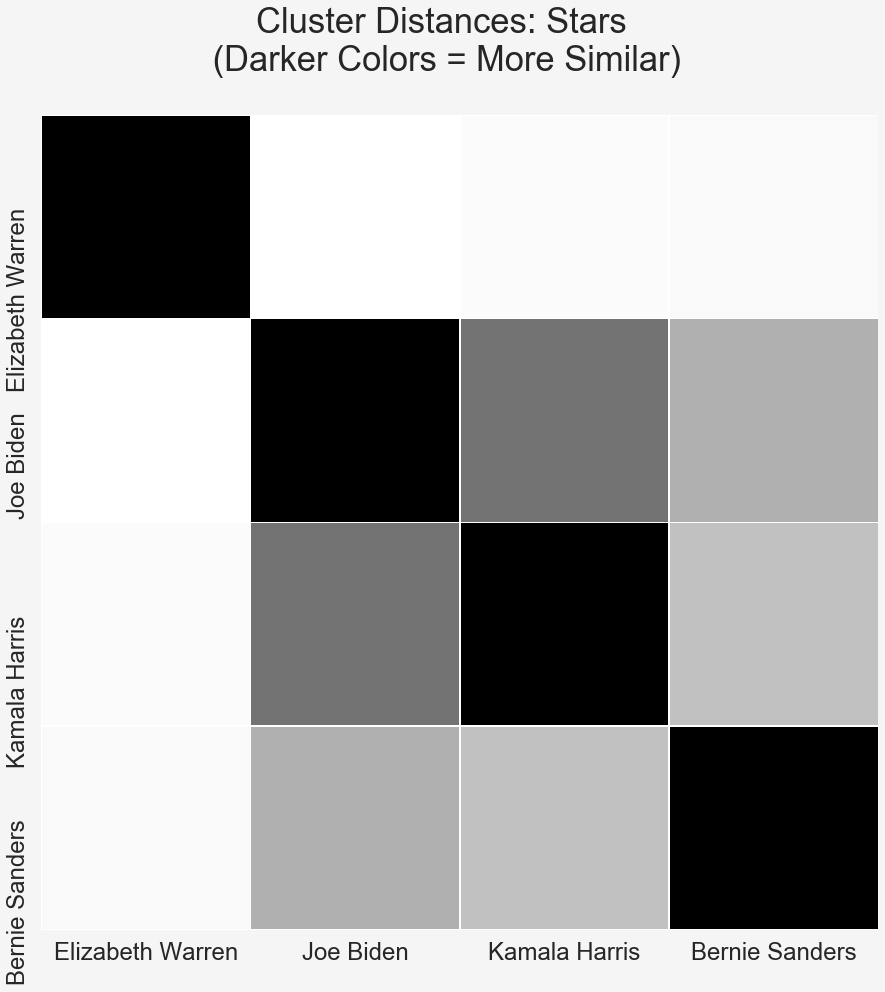

,Beto O Rourke,Cory Booker,Pete Buttigieg
Beto O Rourke,0.000000,0.356978,0.398383
Cory Booker,0.356978,0.000000,0.429258
Pete Buttigieg,0.398383,0.429258,0.000000


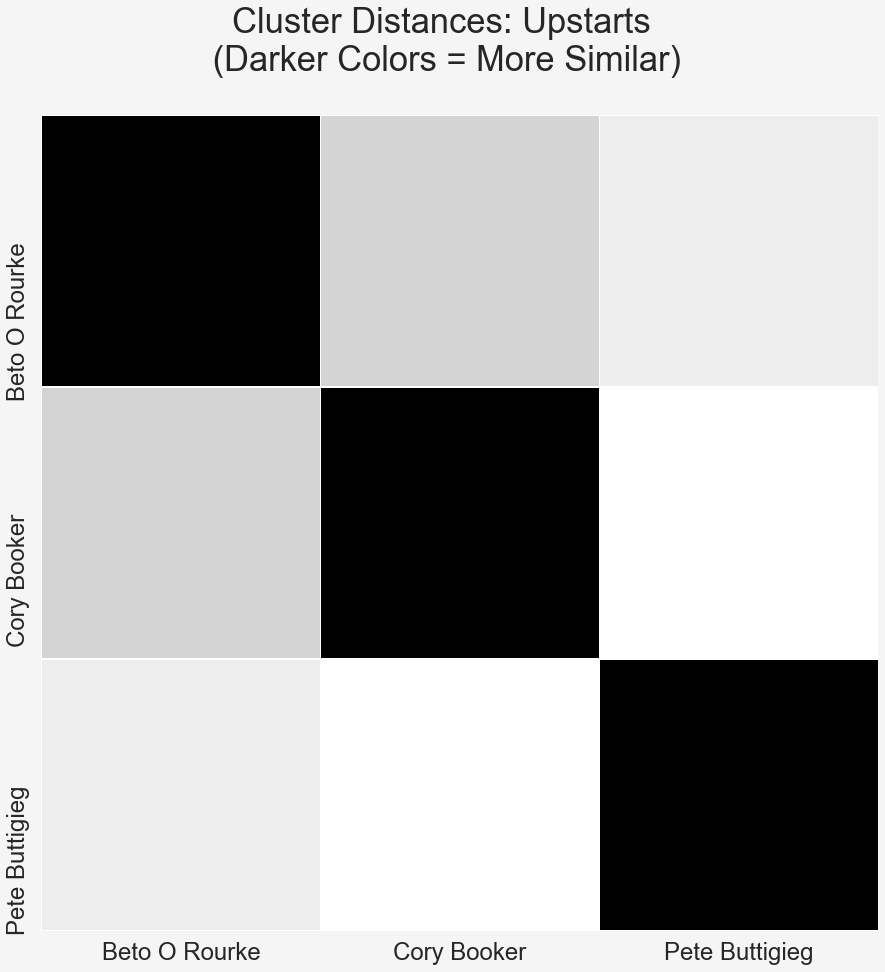

,Amy Klobuchar,Tulsi Gabbard,Kirsten Gillibrand
Amy Klobuchar,0.000000,0.281493,0.220593
Tulsi Gabbard,0.281493,0.000000,0.318841
Kirsten Gillibrand,0.220593,0.318841,0.000000


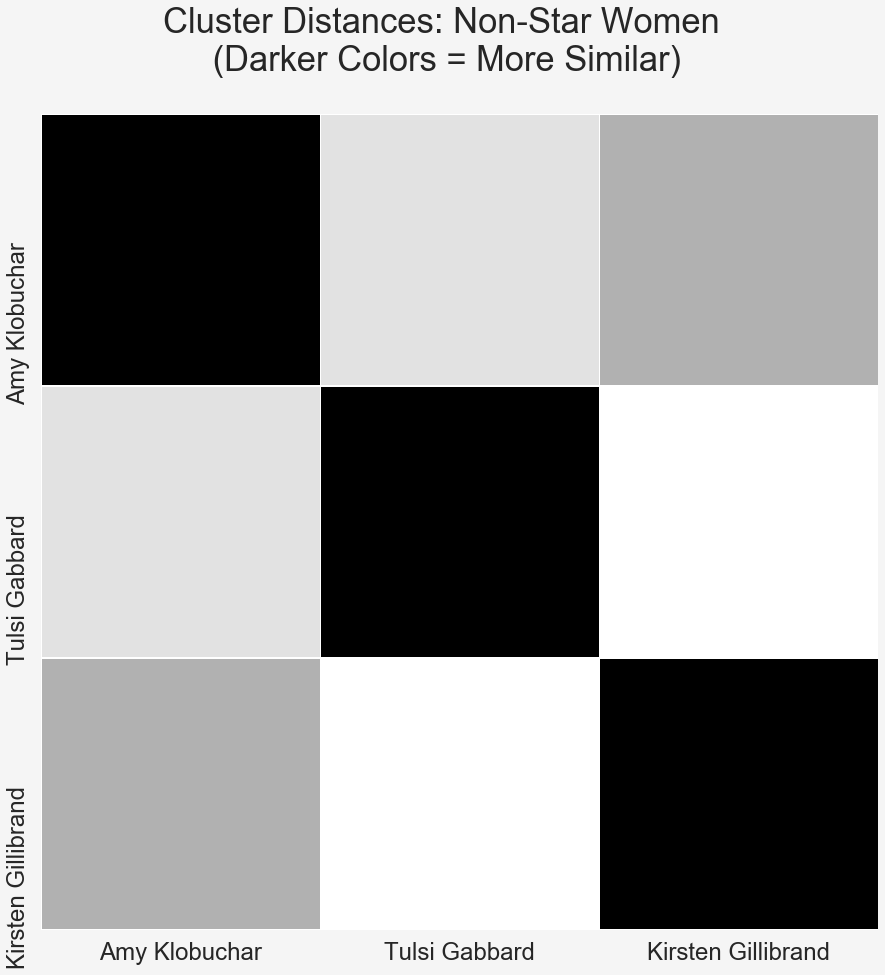

,Tim Ryan,Steve Bullock,John Delaney
Tim Ryan,0.000000,0.525501,0.574245
Steve Bullock,0.525501,0.000000,0.594249
John Delaney,0.574245,0.594249,0.000000


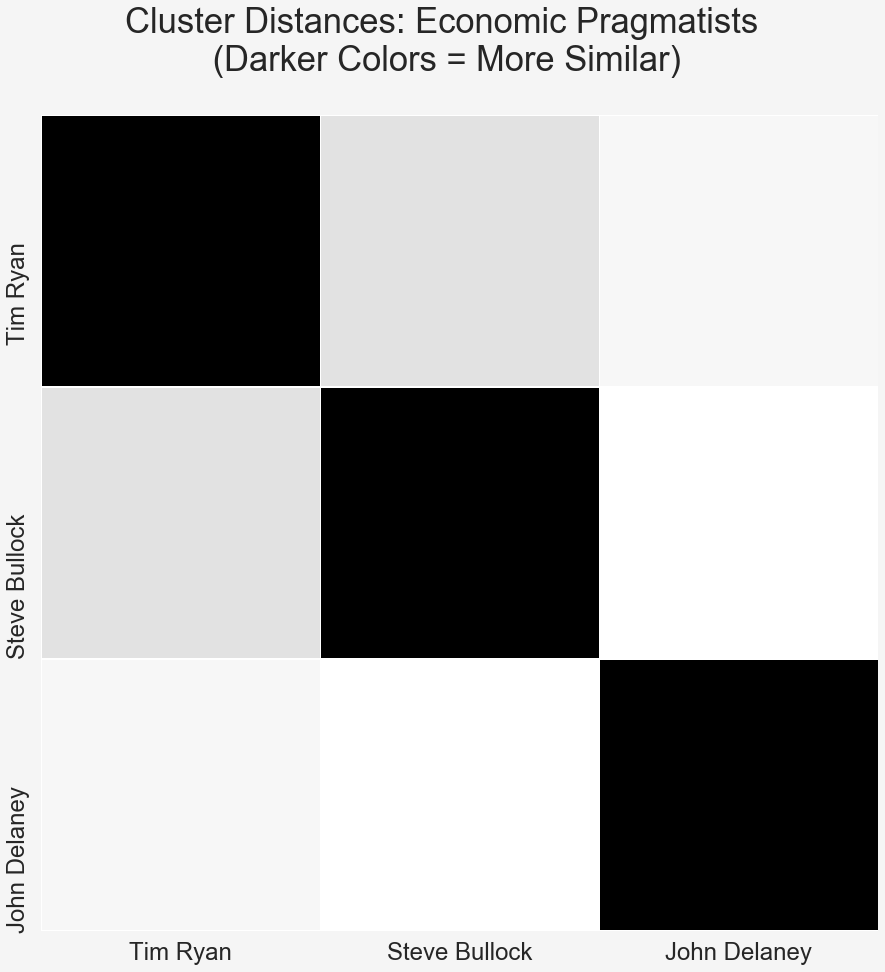

In [68]:
# Define some clusters

stars = {
    "candinate_list": [
                    "Joe Biden", 
                    "Elizabeth Warren", 
                    "Bernie Sanders", 
                    "Kamala Harris"
    ],
    "name":"Stars"
}

upstarts = {
    "candinate_list": [
                    "Cory Booker", 
                    "Beto O Rourke", 
                    "Pete Buttigieg"
    ],
    "name":"Upstarts"
}

nsw = {
    "candinate_list": [
                    "Tulsi Gabbard", 
                    "Amy Klobuchar", 
                    "Kirsten Gillibrand"
    ],
    "name":"Non-Star Women"
}

eps = {
    "candinate_list": [
                    "John Delaney", 
                    "Tim Ryan", 
                    "Steve Bullock", 
    ],
    "name":"Economic Pragmatists"
}

for subset in [stars, upstarts, nsw, eps]:
    subset_heatmap(subset)

### Upstarts Vs Stars Comparison 

,Cory Booker,Beto O Rourke,Pete Buttigieg
Elizabeth Warren,0.514845,0.599459,0.635616
Joe Biden,0.453855,0.488585,0.421810
Kamala Harris,0.332192,0.487902,0.423593
Bernie Sanders,0.549752,0.555405,0.507416


,Cory Booker,Beto O Rourke,Pete Buttigieg
count,4.000000,4.000000,4.000000
mean,0.462661,0.532838,0.497109
std,0.095582,0.054544,0.100607
min,0.332192,0.487902,0.421810
25%,0.423439,0.488415,0.423147
50%,0.484350,0.521995,0.465504
75%,0.523572,0.566418,0.539466
max,0.549752,0.599459,0.635616


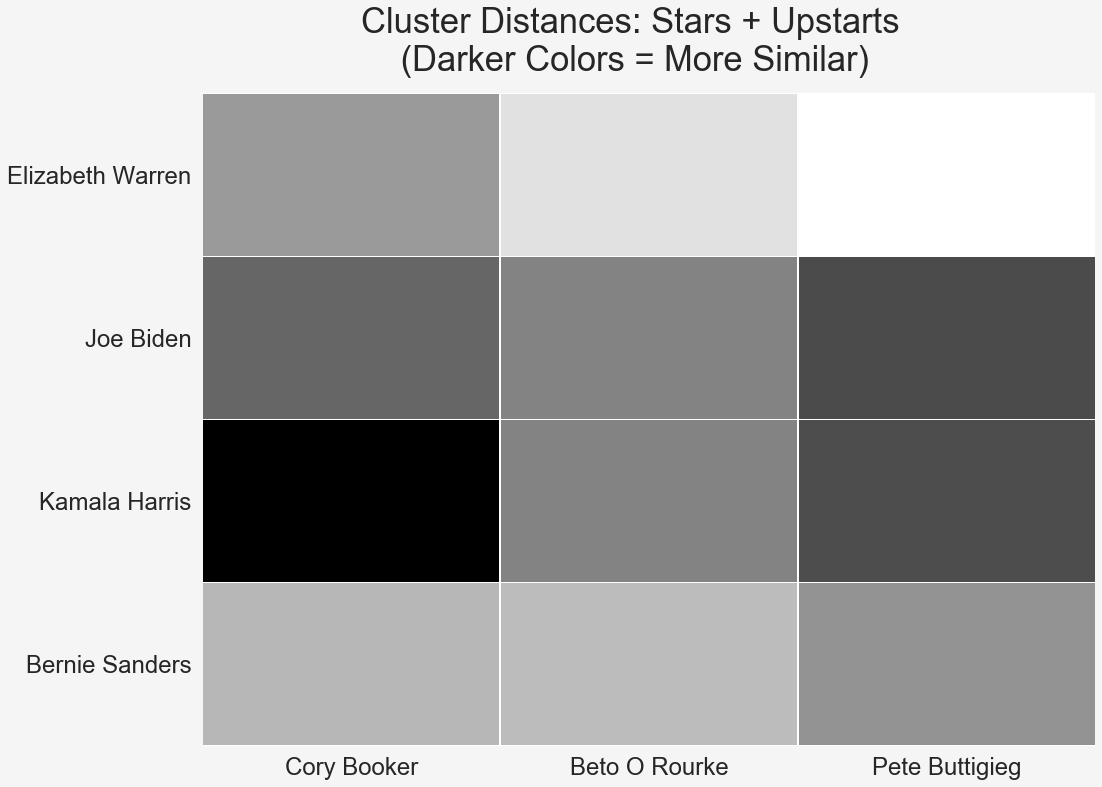

In [69]:
subset_df = df[df.index.isin(stars['candinate_list'])] # Index of Stars
subset_df = subset_df[upstarts['candinate_list']] # Columns of Upstarts
display(subset_df)
display(subset_df.describe())
plt.figure(figsize=(16,12))
sns.heatmap(subset_df, cmap="gist_gray", linewidths=0.7, cbar=False)
plt.suptitle('Cluster Distances: {} \n (Darker Colors = More Similar) \n \n'.format("Stars + Upstarts"))
# plt.savefig("{}".format("Stars + Upstarts2"), dpi=500, bbox_inches="tight", transparent=True)
plt.show()